# COMP2002 Jupyter Notebook Template
Jupyter Notebook for the 70% Coursework for COMP2002.

Task 1.1 - Data Preparation

In [3]:
#Add all imports here
from sklearn.model_selection import cross_val_score
import pandas
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [25]:
#Data preparation
columnNames = ["X1","X2","X3","X4","X5","X6","X7","X8","Y1","Y2"]
data = pandas.read_excel("COMP2002Data.xlsx", names = columnNames)
values = data.values
inputs = values[:,:8].astype(float)
targets = values[:,8:].astype(float)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)
X_train, X_test, Y_train, Y_test = train_test_split(scaled, targets)

Task 1.2 - Regression

Random Forest

In [26]:
#RandomForestGenerator regressor code

regressorRandomForest = RandomForestRegressor(max_depth=20)
regressorRandomForest.fit(X_train, Y_train)
Y_pred = regressorRandomForest.predict(X_test)

#End of RandomForestGenerator regressor code

In [27]:
#NeuralNetwork regressor code

regressorMLP = MLPRegressor(max_iter=16000)
regressorMLP.fit(X_train, Y_train)
Y_pred = regressorMLP.predict(X_test)

#End of NeuralNetwork regressor code

In [28]:
#SVR Regressor Code

regressorSVR = SVR(max_iter=10000)
regressorSVR2 = SVR(max_iter=10000)
regressorSVR.fit(X_train,Y_train[:,0])
regressorSVR2.fit(X_train,Y_train[:,1])
Y_pred = regressorSVR.predict(X_test)
X_pred = regressorSVR2.predict(X_test)

#End of SVR Regressor code

Task 1.3 - Cross Validation

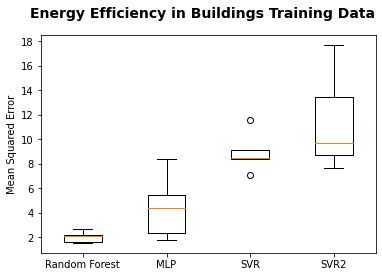

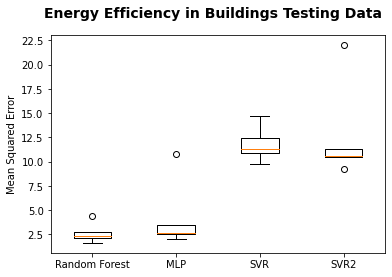

In [29]:
#Cross validation for each of the training scores
scoresRandomForest = cross_val_score(regressorRandomForest, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
scoresMLP = cross_val_score(regressorMLP, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
scoresSVR = cross_val_score(regressorSVR, X_train, Y_train[:,0], cv=5, scoring='neg_mean_squared_error')
scoresSVR2 = cross_val_score(regressorSVR2, X_train, Y_train[:,1], cv=5, scoring='neg_mean_squared_error')
#Making all the training validation positive
scoresRandomForest = np.abs(scoresRandomForest)
scoresMLP = np.abs(scoresMLP)
scoresSVR = np.abs(scoresSVR)
scoresSVR2 = np.abs(scoresSVR2)
#Cross validation for each of the testing scores
test_scoresRandomForest = cross_val_score(regressorRandomForest, X_test, Y_test, cv=5, scoring='neg_mean_squared_error')
test_scoresMLP = cross_val_score(regressorMLP, X_test, Y_test, cv=5, scoring='neg_mean_squared_error')
test_scoresSVR = cross_val_score(regressorSVR, X_test, Y_test[:,0], cv=5, scoring='neg_mean_squared_error')
test_scoresSVR2 = cross_val_score(regressorSVR2, X_test, Y_test[:,1], cv=5, scoring='neg_mean_squared_error')

#Making all the testing validation positive
test_scoresRandomForest = np.abs(test_scoresRandomForest)
test_scoresMLP = np.abs(test_scoresMLP)
test_scoresSVR = np.abs(test_scoresSVR)
test_scoresSVR2 = np.abs(test_scoresSVR2)

###Plotting the training validation data onto a boxplot

plt.boxplot([scoresRandomForest, scoresMLP, scoresSVR, scoresSVR2])
plt.suptitle('Energy Efficiency in Buildings Training Data', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error')
plt.xticks([1,2,3,4], ['Random Forest', 'MLP', 'SVR', 'SVR2'])
plt.show()

###Plotting the testing validation data onto a boxplot
plt.boxplot([test_scoresRandomForest, test_scoresMLP, test_scoresSVR, test_scoresSVR2])
plt.suptitle('Energy Efficiency in Buildings Testing Data', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error')
plt.xticks([1,2,3,4], ['Random Forest', 'MLP', 'SVR', 'SVR2'])
plt.show()

# Task 2: Optimisation

In [4]:
#Variable that reads the data from the txt file
data = pandas.read_csv("Modules.txt", sep = "|", header = None)

data


,0,1,2,3
0,MOD001,Zacharias Karstensen,2,"MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD0..."
1,MOD002,Dominykas Cleary,2,"MOD001,MOD003,MOD004,MOD005,MOD006,MOD007,MOD0..."
2,MOD003,Zacharias Karstensen,2,"MOD001,MOD002,MOD004,MOD005,MOD006,MOD007,MOD0..."
3,MOD004,Laila Deniau,1,"MOD001,MOD002,MOD003,MOD005,MOD006,MOD007,MOD0..."
4,MOD005,Brahma O Braonain,2,"MOD001,MOD002,MOD003,MOD004,MOD006,MOD007,MOD0..."
5,MOD006,Brahma O Braonain,3,"MOD001,MOD002,MOD003,MOD004,MOD005,MOD007,MOD0..."
6,MOD007,Ruh Kerekes,1,"MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD0..."
7,MOD008,Brahma O Braonain,2,"MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD0..."
8,MOD009,Dominykas Cleary,3,"MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD0..."
9,MOD010,Dominykas Cleary,2,"MOD001,MOD002,MOD003,MOD004,MOD005,M0D006,MOD0..."


In [6]:
#Module class to hold objects
class Module:
    def __init__(self, moduleName, moduleLeader, labs, clashes):
        self.moduleName = moduleName
        self.moduleLeader = moduleLeader
        self.labs = labs
        self.clashes = clashes
        self.labs = False

#An array that will hold all the information about the specific module
list = []
for index, row in data.iterrows():
    list.append(Module(row[0], row[1], row[2], row[3]))

In [8]:
def RuinandRecreate():
    #Creates the module list with the amount of times it has to go into the timetable
    import random
    moduleAmount = []
    for i in range(len(list)):
        moduleAmount.append(list[i])
        for j in range(list[i].labs):
            list[i].lab = True
            moduleAmount.append(list[i])
    #Make sure that the frame gets filled
    i = len(moduleAmount)
    while(len(moduleAmount) < 60):
        moduleAmount.append("000")
    #Shuffled the array for a random solution
    np.random.shuffle(moduleAmount)
    df = pandas.DataFrame(columns=['LEC1','LAB1','LAB2'],index=range(0,20))
    j = 0
    k = 0
    for i in range(len(moduleAmount)):
        if i < 20:
            df.loc[i, 'LEC1'] = moduleAmount[i]
        elif i >= 20 and i < 40:
            df.loc[j, 'LAB1'] = moduleAmount[i]
            j += 1
        elif i >= 40 and i < 60:
            df.loc[k, 'LAB2'] = moduleAmount[i]
            k += 1
    df



60


,LEC1,LAB1,LAB2
0,000,000,<__main__.Module object at 0x00000140BCC02680>
1,000,<__main__.Module object at 0x00000140BCC02E30>,000
2,000,000,000
3,000,000,000
4,000,<__main__.Module object at 0x00000140BCC02FB0>,000
5,000,000,<__main__.Module object at 0x00000140BCC02B30>
6,000,000,<__main__.Module object at 0x00000140B9E4F2B0>
7,<__main__.Module object at 0x00000140B9E4F8E0>,<__main__.Module object at 0x00000140BCC03D60>,000
8,<__main__.Module object at 0x00000140B9E4FAF0>,000,000
9,000,000,<__main__.Module object at 0x00000140BCC025F0>


## Fitness Function 